# Inequality seroprevalence

In this we use the data from Ward et al.

**Note:** We cannot use the data from the [OpenSafely infection paper](https://www.thelancet.com/action/showPdf?pii=S0140-6736%2821%2900634-6) since they only look at testing rate and not prevalence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# path to directory containing record named june_record.h5
record_path = "./records/test_record_1/"

## Load data

In [3]:
people_df = pd.read_csv(record_path + "/people.csv")

In [4]:
people_df.set_index('id', inplace=True)

In [5]:
infections_df = pd.read_csv(record_path + "/infections.csv")

In [6]:
infections_df = infections_df.rename(columns={"Unnamed: 0": "id"})

In [7]:
infections_df.set_index("id", inplace=True)

In [8]:
deaths_df = pd.read_csv(record_path + "/deaths.csv")

In [9]:
deaths_df = deaths_df.rename(columns={"Unnamed: 0": "id"})

In [10]:
deaths_df.set_index("id", inplace=True)

In [23]:
people_df.head()

,age,socioeconomic_index,primary_activity_id,residence_id,area_id,sex,ethnicity,primary_activity_type,residence_type
id,,,,,,,,,
12762019,0,3,0,5225984,40080,f,A,None,household
12762020,1,3,0,5225993,40080,m,A,None,household
12762021,1,3,0,5225986,40080,m,A,None,household
12762022,1,3,0,5225984,40080,m,A,None,household
12762023,2,3,4260,5226005,40080,f,A,school,household


## Analyse ethnicity

In [12]:
infected_by_ethnicity = infections_df.groupby(['ethnicity', 'timestamp']).size()
n_by_ethnicity = people_df.groupby('ethnicity').size()

In [13]:
prevalence_race = {
    'White': [4.8,5.,5.2],
    'Mixed': [7.1,8.9,11.1],
    'Asian': [11.0,11.9,12.8],
    'Black': [15.8,17.3,19.0],
    'Other': [10.2,12.3,14.7]
}
'''
A=white
B=mixed
C=asian
D=Black
E=other
'''

'\nA=white\nB=mixed\nC=asian\nD=Black\nE=other\n'

In [14]:
prevalence_ethnicity = 100*infected_by_ethnicity.unstack(level=0).cumsum()/n_by_ethnicity

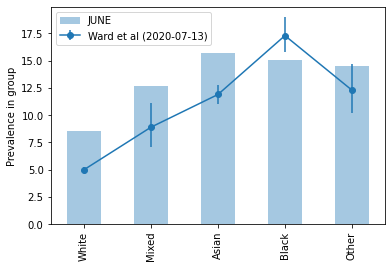

In [15]:
ax = prevalence_ethnicity.loc['2020-07-13'].plot.bar(rot=0, 
                                label='JUNE',
                                alpha=0.4
                                )

plt.errorbar(list(prevalence_race.keys()),
        [prev[1] for age, prev in prevalence_race.items()],
         yerr=[
             [prev[1]-prev[0] for age, prev in prevalence_race.items()],
             [prev[2]-prev[1] for age, prev in prevalence_race.items()]
         ],
        marker='o',
        label='Ward et al (2020-07-13)'
)
plt.xlabel('')
plt.xticks(rotation='vertical')
ax.set_xticklabels(prevalence_race.keys())
plt.ylabel('Prevalence in group')
plt.legend()
plt.show()

In [41]:
ethnicity_ward_means = []
ethnicity_ward_upper_means = []
ethnicity_ward_lower_means = []
for idx, i in enumerate(prevalence_race):
    ethnicity_ward_means.append(prevalence_race[i][1]*list(n_by_ethnicity)[idx]/100)
    ethnicity_ward_upper_means.append(prevalence_race[i][2]*list(n_by_ethnicity)[idx]/100)
    ethnicity_ward_lower_means.append(prevalence_race[i][0]*list(n_by_ethnicity)[idx]/100)

In [42]:
ethnicity_june_norm = np.sum(prevalence_ethnicity.loc['2020-07-13']*n_by_ethnicity/100)
ethnicity_ward_norm = np.sum(ethnicity_ward_means)
ethnicity_ward_upper_norm = np.sum(ethnicity_ward_upper_means)
ethnicity_ward_lower_norm = np.sum(ethnicity_ward_lower_means)

In [43]:
ethnicity_infected_ward = []
for idx, i in enumerate(prevalence_race):
    ethnicity_infected_ward.append(prevalence_race[i][1]*list(n_by_ethnicity)[idx])

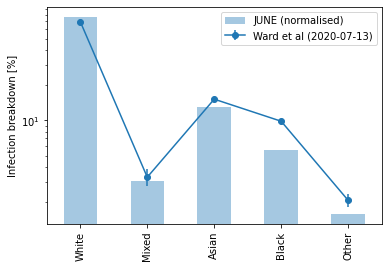

In [50]:
ax = (prevalence_ethnicity.loc['2020-07-13']*n_by_ethnicity/ethnicity_june_norm).plot.bar(rot=0, 
                                label='JUNE (normalised)',
                                alpha=0.4
                                )

plt.errorbar(np.arange(len(ethnicity_ward_means)), np.array(ethnicity_ward_means)*100/ethnicity_ward_norm,
         yerr=[
             np.array(ethnicity_ward_means)*100/ethnicity_ward_norm - np.array(ethnicity_ward_lower_means)*100/ethnicity_ward_lower_norm,
             np.array(ethnicity_ward_upper_means)*100/ethnicity_ward_upper_norm - np.array(ethnicity_ward_means)*100/ethnicity_ward_norm
         ],
        marker='o',
        label='Ward et al (2020-07-13)'
)

plt.xlabel('')
plt.xticks(rotation='vertical')
ax.set_xticklabels(prevalence_race.keys())
plt.ylabel('Infection breakdown [%]')
plt.yscale('log')
plt.legend()
plt.show()

## Analyse socioeconomic

In [15]:
prevalence_deprivation = {
    '1': [6.8,7.3,7.7],
    '2': [6.0,6.4,6.8],
    '3': [5.5,5.9,6.3],
    '4': [4.9,5.2,5.6],
    '5': [4.6,5.,5.4]
}

In [16]:
infected_by_socioeconomic = infections_df.groupby(['socioeconomic_index', 'timestamp']).size()
n_by_socioeconomic = people_df.groupby('socioeconomic_index').size()

In [17]:
infected_by_socioeconomic= 100*infected_by_socioeconomic.unstack(level=0).cumsum()/n_by_socioeconomic

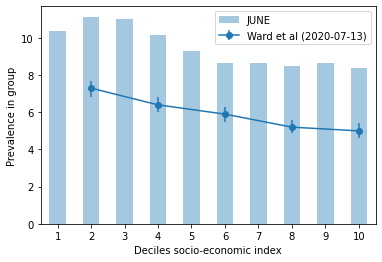

In [35]:
ax = infected_by_socioeconomic.loc['2020-07-13'].plot.bar(rot=0, 
                                label='JUNE',
                                alpha=0.4
                                )

plt.errorbar([1,3,5,7,9],
        [prev[1] for age, prev in prevalence_deprivation.items()],
         yerr=[
             [prev[1]-prev[0] for age, prev in prevalence_deprivation.items()],
             [prev[2]-prev[1] for age, prev in prevalence_deprivation.items()]
         ],
        marker='o',
        label='Ward et al (2020-07-13)'
)

ax.set_xticklabels(infected_by_socioeconomic.columns)
plt.ylabel('Prevalence in group')
plt.xlabel('Deciles socio-economic index')
plt.legend()
plt.show()

In [39]:
socio_ward_means = []
for i in prevalence_deprivation:
    socio_ward_means.append(prevalence_deprivation[i][1])

In [47]:
socio_june_norm = np.sum(infected_by_socioeconomic.loc['2020-07-13'])*0.5
socio_ward_norm = np.sum(socio_ward_means)

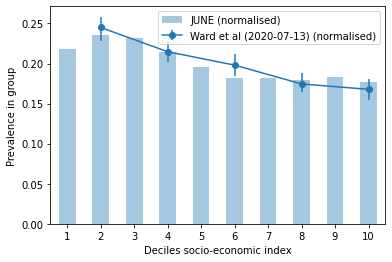

In [49]:
ax = (infected_by_socioeconomic.loc['2020-07-13']/socio_june_norm).plot.bar(rot=0, 
                                label='JUNE (normalised)',
                                alpha=0.4
                                )

plt.errorbar([1,3,5,7,9],
        [prev[1]/socio_ward_norm for age, prev in prevalence_deprivation.items()],
         yerr=[
             [(prev[1]-prev[0])/socio_ward_norm for age, prev in prevalence_deprivation.items()],
             [(prev[2]-prev[1])/socio_ward_norm for age, prev in prevalence_deprivation.items()]
         ],
        marker='o',
        label='Ward et al (2020-07-13) (normalised)'
)

ax.set_xticklabels(infected_by_socioeconomic.columns)
plt.ylabel('Prevalence in group')
plt.xlabel('Deciles socio-economic index')
plt.legend()
plt.show()